In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cust_df = pd.read_csv('train_santander.csv', encoding='latin-1')
print('데이터셋의 크기:', cust_df.shape)
cust_df.head(3)

데이터셋의 크기: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,...,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_trasp_var17_in_hace3,num_trasp_var17_in_ult1,num_trasp_var17_out_hace3,num_trasp_var17_out_ult1,num_trasp_var33_in_hace3,num_trasp_var33_in_ult1,num_trasp_var33_out_hace3,num_trasp_var33_out_ult1,num_venta_var44_hace3,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_var2_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,88.89,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0.18,3.0,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [18]:
#null 값이 있는지 확인
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [19]:
print(cust_df[cust_df['TARGET']==1].TARGET.count())
print('불만족 고객의 비율:', cust_df[cust_df['TARGET']==1].TARGET.count()/cust_df.TARGET.count())

3008
불만족 고객의 비율: 0.0395685345961589


In [20]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,...,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_trasp_var17_in_hace3,num_trasp_var17_in_ult1,num_trasp_var17_out_hace3,num_trasp_var17_out_ult1,num_trasp_var33_in_hace3,num_trasp_var33_in_ult1,num_trasp_var33_out_hace3,num_trasp_var33_out_ult1,num_venta_var44_hace3,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_var2_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.0,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.000000,76020.000000,76020.000000,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.000000,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.

In [21]:
cust_df.var3.value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64

In [22]:
cust_df['var3'].replace(-999999, 2, inplace=True)
#ID 피쳐는 단순 식별자이므로 피처 Drop
cust_df.drop('ID', axis=1, inplace=True)

#피처 데이터 세트와 target 값 분리
X_features = cust_df.drop('TARGET', axis=1)
y_labels = cust_df['TARGET']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=123)
print('학습 세트 shape:', X_train.shape, '테스트 세트 shape:', X_test.shape)
print('학습 세트 target 값 분포 비율')
print(y_train.value_counts()/y_train.count())
print('테스트 세트 target 값 분포 비율')
print(y_test.value_counts()/y_test.count())

학습 세트 shape: (60816, 369) 테스트 세트 shape: (15204, 369)
학습 세트 target 값 분포 비율
0    0.960652
1    0.039348
Name: TARGET, dtype: float64
테스트 세트 target 값 분포 비율
0    0.95955
1    0.04045
Name: TARGET, dtype: float64


In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

#성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC', xgb_roc_score)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82953	validation_1-auc:0.80341
[1]	validation_0-auc:0.83528	validation_1-auc:0.80590
[2]	validation_0-auc:0.84345	validation_1-auc:0.81296
[3]	validation_0-auc:0.85011	validation_1-auc:0.81639
[4]	validation_0-auc:0.85337	validation_1-auc:0.81799
[5]	validation_0-auc:0.85615	validation_1-auc:0.81946
[6]	validation_0-auc:0.85817	validation_1-auc:0.82084
[7]	validation_0-auc:0.86264	validation_1-auc:0.82341
[8]	validation_0-auc:0.86517	validation_1-auc:0.82423
[9]	validation_0-auc:0.86742	validation_1-auc:0.82379
[10]	validation_0-auc:0.87081	validation_1-auc:0.82472
[11]	validation_0-auc:0.87388	validation_1-auc:0.82664
[12]	validation_0-auc:0.87611	validation_1-auc:0.82642
[13]	validation_0-auc:0.87803	validation_1-auc:0.82735
[14]	validation_0-auc:0.88092	validation_1-auc:0.82733
[15]	validation_0-auc:0.88259	validation_1-auc:0.82775
[16]	validation_0-auc:0.88465	validation_1-auc:0.82706
[17]	validation_0-auc:0.88616	validation_1-auc:0.82673
[18]	validation_0-au

In [31]:
from sklearn.model_selection import GridSearchCV

#하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소 시키기
xgb_clf = XGBClassifier(n_estimators=100, random_state=123)

#colsample_bytree는 트리 생성에 필요한 피처를 임의로 샘플링하는데 사용(매우 많은 피쳐가 있는 경우 과적합을 조정하는데 이용)
params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

#cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid = params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC:', xgb_roc_score)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80468	validation_1-auc:0.78684
[1]	validation_0-auc:0.82582	validation_1-auc:0.80163
[2]	validation_0-auc:0.83286	validation_1-auc:0.80796
[3]	validation_0-auc:0.83493	validation_1-auc:0.80831
[4]	validation_0-auc:0.83728	validation_1-auc:0.81134
[5]	validation_0-auc:0.83626	validation_1-auc:0.81030
[6]	validation_0-auc:0.83251	validation_1-auc:0.80647
[7]	validation_0-auc:0.84000	validation_1-auc:0.81476
[8]	validation_0-auc:0.84656	validation_1-auc:0.81966
[9]	validation_0-auc:0.85046	validation_1-auc:0.82309
[10]	validation_0-auc:0.85064	validation_1-auc:0.82408
[11]	validation_0-auc:0.85401	validation_1-auc:0.82478
[12]	validation_0-auc:0.85615	validation_1-auc:0.82507
[13]	validation_0-auc:0.85799	validation_1-auc:0.82561
[14]	validation_0-auc:0.85969	validation_1-auc:0.82566
[15]	validation_0-auc:0.86055	validation_1-auc:0.82552
[16]	validation_0-auc:0.86187	validation_1-auc:0.82483
[17]	validation_0-auc:0.86320	validation_1-auc:0.82677
[18]	validation_0-au

[23]	validation_0-auc:0.86992	validation_1-auc:0.82680
[24]	validation_0-auc:0.87024	validation_1-auc:0.82698
[25]	validation_0-auc:0.87118	validation_1-auc:0.82831
[26]	validation_0-auc:0.87192	validation_1-auc:0.82871
[27]	validation_0-auc:0.87218	validation_1-auc:0.82867
[28]	validation_0-auc:0.87288	validation_1-auc:0.82816
[29]	validation_0-auc:0.87315	validation_1-auc:0.82831
[30]	validation_0-auc:0.87373	validation_1-auc:0.82785
[31]	validation_0-auc:0.87421	validation_1-auc:0.82778
[32]	validation_0-auc:0.87492	validation_1-auc:0.82737
[33]	validation_0-auc:0.87526	validation_1-auc:0.82718
[34]	validation_0-auc:0.87552	validation_1-auc:0.82673
[35]	validation_0-auc:0.87638	validation_1-auc:0.82646
[36]	validation_0-auc:0.87661	validation_1-auc:0.82652
[37]	validation_0-auc:0.87756	validation_1-auc:0.82720
[38]	validation_0-auc:0.87860	validation_1-auc:0.82703
[39]	validation_0-auc:0.87892	validation_1-auc:0.82648
[40]	validation_0-auc:0.87945	validation_1-auc:0.82656
[41]	valid

[35]	validation_0-auc:0.87211	validation_1-auc:0.82270
[36]	validation_0-auc:0.87286	validation_1-auc:0.82230
[37]	validation_0-auc:0.87306	validation_1-auc:0.82274
[38]	validation_0-auc:0.87394	validation_1-auc:0.82266
[39]	validation_0-auc:0.87429	validation_1-auc:0.82247
[40]	validation_0-auc:0.87439	validation_1-auc:0.82246
[41]	validation_0-auc:0.87486	validation_1-auc:0.82182
[42]	validation_0-auc:0.87619	validation_1-auc:0.82121
[43]	validation_0-auc:0.87646	validation_1-auc:0.82131
[44]	validation_0-auc:0.87679	validation_1-auc:0.82116
[45]	validation_0-auc:0.87752	validation_1-auc:0.82052
[46]	validation_0-auc:0.87792	validation_1-auc:0.82047
[47]	validation_0-auc:0.87816	validation_1-auc:0.82069
[48]	validation_0-auc:0.87837	validation_1-auc:0.82059
[49]	validation_0-auc:0.87848	validation_1-auc:0.82039
[50]	validation_0-auc:0.87864	validation_1-auc:0.82027
[51]	validation_0-auc:0.87872	validation_1-auc:0.82000
[52]	validation_0-auc:0.87918	validation_1-auc:0.81947
[53]	valid

[18]	validation_0-auc:0.88566	validation_1-auc:0.81998
[19]	validation_0-auc:0.88617	validation_1-auc:0.81956
[20]	validation_0-auc:0.88739	validation_1-auc:0.81947
[21]	validation_0-auc:0.88956	validation_1-auc:0.81911
[22]	validation_0-auc:0.89041	validation_1-auc:0.81870
[23]	validation_0-auc:0.89095	validation_1-auc:0.81936
[24]	validation_0-auc:0.89131	validation_1-auc:0.81914
[25]	validation_0-auc:0.89258	validation_1-auc:0.82074
[26]	validation_0-auc:0.89301	validation_1-auc:0.82049
[27]	validation_0-auc:0.89336	validation_1-auc:0.81999
[28]	validation_0-auc:0.89424	validation_1-auc:0.82050
[29]	validation_0-auc:0.89441	validation_1-auc:0.82075
[30]	validation_0-auc:0.89499	validation_1-auc:0.82096
[31]	validation_0-auc:0.89531	validation_1-auc:0.82020
[32]	validation_0-auc:0.89558	validation_1-auc:0.82030
[33]	validation_0-auc:0.89568	validation_1-auc:0.82028
[34]	validation_0-auc:0.89727	validation_1-auc:0.81998
[35]	validation_0-auc:0.89744	validation_1-auc:0.81987
[36]	valid

[28]	validation_0-auc:0.88619	validation_1-auc:0.81910
[29]	validation_0-auc:0.88737	validation_1-auc:0.81911
[30]	validation_0-auc:0.88892	validation_1-auc:0.81845
[31]	validation_0-auc:0.88917	validation_1-auc:0.81773
[32]	validation_0-auc:0.88992	validation_1-auc:0.81645
[33]	validation_0-auc:0.88996	validation_1-auc:0.81641
[34]	validation_0-auc:0.89037	validation_1-auc:0.81647
[35]	validation_0-auc:0.89064	validation_1-auc:0.81613
[36]	validation_0-auc:0.89079	validation_1-auc:0.81476
[37]	validation_0-auc:0.89089	validation_1-auc:0.81435
[38]	validation_0-auc:0.89128	validation_1-auc:0.81421
[0]	validation_0-auc:0.82154	validation_1-auc:0.79839
[1]	validation_0-auc:0.83646	validation_1-auc:0.81334
[2]	validation_0-auc:0.84198	validation_1-auc:0.81715
[3]	validation_0-auc:0.84660	validation_1-auc:0.82068
[4]	validation_0-auc:0.84876	validation_1-auc:0.82265
[5]	validation_0-auc:0.84861	validation_1-auc:0.81850
[6]	validation_0-auc:0.84674	validation_1-auc:0.81620
[7]	validation_0-

[40]	validation_0-auc:0.88096	validation_1-auc:0.82506
[41]	validation_0-auc:0.88122	validation_1-auc:0.82473
[42]	validation_0-auc:0.88268	validation_1-auc:0.82358
[43]	validation_0-auc:0.88282	validation_1-auc:0.82302
[44]	validation_0-auc:0.88352	validation_1-auc:0.82273
[45]	validation_0-auc:0.88375	validation_1-auc:0.82259
[46]	validation_0-auc:0.88390	validation_1-auc:0.82252
[47]	validation_0-auc:0.88427	validation_1-auc:0.82288
[48]	validation_0-auc:0.88434	validation_1-auc:0.82276
[49]	validation_0-auc:0.88438	validation_1-auc:0.82245
[50]	validation_0-auc:0.88458	validation_1-auc:0.82202
[51]	validation_0-auc:0.88466	validation_1-auc:0.82211
[52]	validation_0-auc:0.88477	validation_1-auc:0.82195
[0]	validation_0-auc:0.81795	validation_1-auc:0.79499
[1]	validation_0-auc:0.83003	validation_1-auc:0.80885
[2]	validation_0-auc:0.83198	validation_1-auc:0.81320
[3]	validation_0-auc:0.83570	validation_1-auc:0.81479
[4]	validation_0-auc:0.83780	validation_1-auc:0.81559
[5]	validation_

[26]	validation_0-auc:0.87084	validation_1-auc:0.82759
[27]	validation_0-auc:0.87145	validation_1-auc:0.82740
[28]	validation_0-auc:0.87159	validation_1-auc:0.82727
[29]	validation_0-auc:0.87188	validation_1-auc:0.82728
[30]	validation_0-auc:0.87218	validation_1-auc:0.82687
[31]	validation_0-auc:0.87244	validation_1-auc:0.82676
[32]	validation_0-auc:0.87301	validation_1-auc:0.82567
[33]	validation_0-auc:0.87345	validation_1-auc:0.82536
[34]	validation_0-auc:0.87362	validation_1-auc:0.82493
[35]	validation_0-auc:0.87407	validation_1-auc:0.82522
[36]	validation_0-auc:0.87466	validation_1-auc:0.82425
[37]	validation_0-auc:0.87503	validation_1-auc:0.82396
[38]	validation_0-auc:0.87532	validation_1-auc:0.82393
[39]	validation_0-auc:0.87561	validation_1-auc:0.82385
[40]	validation_0-auc:0.87644	validation_1-auc:0.82275
[41]	validation_0-auc:0.87718	validation_1-auc:0.82249
[42]	validation_0-auc:0.87765	validation_1-auc:0.82270
[43]	validation_0-auc:0.87825	validation_1-auc:0.82293
[44]	valid

[20]	validation_0-auc:0.88960	validation_1-auc:0.82417
[21]	validation_0-auc:0.89042	validation_1-auc:0.82496
[22]	validation_0-auc:0.89222	validation_1-auc:0.82413
[23]	validation_0-auc:0.89285	validation_1-auc:0.82389
[24]	validation_0-auc:0.89298	validation_1-auc:0.82416
[25]	validation_0-auc:0.89363	validation_1-auc:0.82353
[26]	validation_0-auc:0.89380	validation_1-auc:0.82303
[27]	validation_0-auc:0.89476	validation_1-auc:0.82102
[28]	validation_0-auc:0.89501	validation_1-auc:0.81937
[29]	validation_0-auc:0.89552	validation_1-auc:0.81896
[30]	validation_0-auc:0.89573	validation_1-auc:0.81888
[31]	validation_0-auc:0.89594	validation_1-auc:0.81896
[32]	validation_0-auc:0.89614	validation_1-auc:0.81871
[33]	validation_0-auc:0.89621	validation_1-auc:0.81801
[34]	validation_0-auc:0.89695	validation_1-auc:0.81794
[35]	validation_0-auc:0.89731	validation_1-auc:0.81681
[36]	validation_0-auc:0.89742	validation_1-auc:0.81646
[37]	validation_0-auc:0.89812	validation_1-auc:0.81644
[38]	valid

[27]	validation_0-auc:0.88706	validation_1-auc:0.81894
[28]	validation_0-auc:0.88740	validation_1-auc:0.81920
[29]	validation_0-auc:0.88762	validation_1-auc:0.81883
[30]	validation_0-auc:0.88783	validation_1-auc:0.81857
[31]	validation_0-auc:0.88802	validation_1-auc:0.81832
[32]	validation_0-auc:0.88819	validation_1-auc:0.81837
[33]	validation_0-auc:0.88884	validation_1-auc:0.81786
[34]	validation_0-auc:0.88942	validation_1-auc:0.81710
[35]	validation_0-auc:0.88960	validation_1-auc:0.81693
[36]	validation_0-auc:0.88971	validation_1-auc:0.81705
[37]	validation_0-auc:0.89026	validation_1-auc:0.81668
[38]	validation_0-auc:0.89049	validation_1-auc:0.81656
[39]	validation_0-auc:0.89134	validation_1-auc:0.81577
[40]	validation_0-auc:0.89145	validation_1-auc:0.81563
[41]	validation_0-auc:0.89164	validation_1-auc:0.81525
[0]	validation_0-auc:0.81645	validation_1-auc:0.79146
[1]	validation_0-auc:0.83003	validation_1-auc:0.80271
[2]	validation_0-auc:0.84149	validation_1-auc:0.81427
[3]	validatio

In [32]:
#n_estimators는 1000으로 증가, learning_rate=0.2로 감소, reg_alpha=0.03 추가
xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.2, reg_alpha=0.03,
                       colsample_bytee=0.5, max_depth=5, min_child_weight=3, random_state=123)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200,
           eval_metric='auc', eval_set=[(X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC:', xgb_roc_score)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.80152
[1]	validation_0-auc:0.80333
[2]	validation_0-auc:0.81049
[3]	validation_0-auc:0.80981
[4]	validation_0-auc:0.81296
[5]	validation_0-auc:0.81441
[6]	validation_0-auc:0.81620
[7]	validation_0-auc:0.81889
[8]	validation_0-auc:0.82039
[9]	validation_0-auc:0.82093
[10]	validation_0-auc:0.82311
[11]	validation_0-auc:0.82432
[12]	validation_0-auc:0.82429
[13]	validation_0-auc:0.82524
[14]	validation_0-auc:0.82572
[15]	validation_0-auc:0.82634
[16]	validation_0-auc:0.82637
[17]	validation_0-auc:0.82714
[18]	validation_0-auc:0.82798
[19]	validation_0-auc:0.82880
[20]	validation

In [33]:
#LGBM
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500, random_state=123)
evals=[(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, eval_metric='auc', eval_set=evals, early_stopping_rounds=100, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC:', lgbm_roc_score)

[1]	valid_0's auc: 0.800678	valid_0's binary_logloss: 0.16208
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.80356	valid_0's binary_logloss: 0.157699
[3]	valid_0's auc: 0.811322	valid_0's binary_logloss: 0.154281
[4]	valid_0's auc: 0.816153	valid_0's binary_logloss: 0.151546
[5]	valid_0's auc: 0.818402	valid_0's binary_logloss: 0.1493
[6]	valid_0's auc: 0.822659	valid_0's binary_logloss: 0.147595
[7]	valid_0's auc: 0.824351	valid_0's binary_logloss: 0.146148
[8]	valid_0's auc: 0.825954	valid_0's binary_logloss: 0.14502
[9]	valid_0's auc: 0.826573	valid_0's binary_logloss: 0.144019
[10]	valid_0's auc: 0.827698	valid_0's binary_logloss: 0.143175
[11]	valid_0's auc: 0.827766	valid_0's binary_logloss: 0.1425
[12]	valid_0's auc: 0.828189	valid_0's binary_logloss: 0.14192
[13]	valid_0's auc: 0.827947	valid_0's binary_logloss: 0.141537
[14]	valid_0's auc: 0.828127	valid_0's binary_logloss: 0.141176
[15]	valid_0's auc: 0.829283	valid_0's binary_logloss: 0.14

[138]	valid_0's auc: 0.824369	valid_0's binary_logloss: 0.141238
Early stopping, best iteration is:
[38]	valid_0's auc: 0.832072	valid_0's binary_logloss: 0.138589
ROC AUC: 0.832072443488161


In [35]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200, random_state=123)
params = {'num_leaves':[32,64], 'max_depth':[128,160], 'min_child_samples':[60,100],
         'subsample':[0.8,1]}
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=evals)

print('GridSearchCV 최적 하이퍼 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC:', lgbm_roc_score)

[1]	valid_0's auc: 0.803057	valid_0's binary_logloss: 0.161617
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.810989	valid_0's binary_logloss: 0.156886
[3]	valid_0's auc: 0.812259	valid_0's binary_logloss: 0.153577
[4]	valid_0's auc: 0.814037	valid_0's binary_logloss: 0.150881
[5]	valid_0's auc: 0.818665	valid_0's binary_logloss: 0.148886
[6]	valid_0's auc: 0.818951	valid_0's binary_logloss: 0.147364
[7]	valid_0's auc: 0.822301	valid_0's binary_logloss: 0.146003
[8]	valid_0's auc: 0.823635	valid_0's binary_logloss: 0.144846
[9]	valid_0's auc: 0.82339	valid_0's binary_logloss: 0.144039
[10]	valid_0's auc: 0.824044	valid_0's binary_logloss: 0.143188
[11]	valid_0's auc: 0.824193	valid_0's binary_logloss: 0.1426
[12]	valid_0's auc: 0.825574	valid_0's binary_logloss: 0.141973
[13]	valid_0's auc: 0.825748	valid_0's binary_logloss: 0.141528
[14]	valid_0's auc: 0.826125	valid_0's binary_logloss: 0.141091
[15]	valid_0's auc: 0.827217	valid_0's binary_logloss: 

[19]	valid_0's auc: 0.828214	valid_0's binary_logloss: 0.139715
[20]	valid_0's auc: 0.828646	valid_0's binary_logloss: 0.13956
[21]	valid_0's auc: 0.829422	valid_0's binary_logloss: 0.139323
[22]	valid_0's auc: 0.829915	valid_0's binary_logloss: 0.13917
[23]	valid_0's auc: 0.830591	valid_0's binary_logloss: 0.139026
[24]	valid_0's auc: 0.830915	valid_0's binary_logloss: 0.138929
[25]	valid_0's auc: 0.830871	valid_0's binary_logloss: 0.138852
[26]	valid_0's auc: 0.830747	valid_0's binary_logloss: 0.138842
[27]	valid_0's auc: 0.831325	valid_0's binary_logloss: 0.138678
[28]	valid_0's auc: 0.830801	valid_0's binary_logloss: 0.138643
[29]	valid_0's auc: 0.830421	valid_0's binary_logloss: 0.138721
[30]	valid_0's auc: 0.829989	valid_0's binary_logloss: 0.138762
[31]	valid_0's auc: 0.829849	valid_0's binary_logloss: 0.138783
[32]	valid_0's auc: 0.829712	valid_0's binary_logloss: 0.138788
[33]	valid_0's auc: 0.829956	valid_0's binary_logloss: 0.138769
[34]	valid_0's auc: 0.829994	valid_0's bin

[33]	valid_0's auc: 0.825873	valid_0's binary_logloss: 0.13957
[34]	valid_0's auc: 0.825854	valid_0's binary_logloss: 0.139531
[35]	valid_0's auc: 0.826151	valid_0's binary_logloss: 0.139478
[36]	valid_0's auc: 0.826023	valid_0's binary_logloss: 0.139504
[37]	valid_0's auc: 0.825659	valid_0's binary_logloss: 0.139594
[38]	valid_0's auc: 0.826017	valid_0's binary_logloss: 0.139524
[39]	valid_0's auc: 0.825659	valid_0's binary_logloss: 0.139633
[40]	valid_0's auc: 0.825632	valid_0's binary_logloss: 0.139673
[41]	valid_0's auc: 0.825697	valid_0's binary_logloss: 0.139659
[42]	valid_0's auc: 0.825621	valid_0's binary_logloss: 0.139691
[43]	valid_0's auc: 0.82563	valid_0's binary_logloss: 0.139727
[44]	valid_0's auc: 0.825402	valid_0's binary_logloss: 0.139807
[45]	valid_0's auc: 0.824981	valid_0's binary_logloss: 0.139849
[46]	valid_0's auc: 0.82435	valid_0's binary_logloss: 0.139953
[47]	valid_0's auc: 0.824741	valid_0's binary_logloss: 0.139944
[48]	valid_0's auc: 0.824155	valid_0's bina

[35]	valid_0's auc: 0.830531	valid_0's binary_logloss: 0.138985
[36]	valid_0's auc: 0.830868	valid_0's binary_logloss: 0.138956
[37]	valid_0's auc: 0.831088	valid_0's binary_logloss: 0.138976
[38]	valid_0's auc: 0.830746	valid_0's binary_logloss: 0.13906
[39]	valid_0's auc: 0.830559	valid_0's binary_logloss: 0.139094
[40]	valid_0's auc: 0.830497	valid_0's binary_logloss: 0.139147
[41]	valid_0's auc: 0.830048	valid_0's binary_logloss: 0.139257
[42]	valid_0's auc: 0.82939	valid_0's binary_logloss: 0.139467
[43]	valid_0's auc: 0.829008	valid_0's binary_logloss: 0.139588
[44]	valid_0's auc: 0.828673	valid_0's binary_logloss: 0.13971
[45]	valid_0's auc: 0.827844	valid_0's binary_logloss: 0.139908
[46]	valid_0's auc: 0.827448	valid_0's binary_logloss: 0.140024
[47]	valid_0's auc: 0.826753	valid_0's binary_logloss: 0.140152
[48]	valid_0's auc: 0.826328	valid_0's binary_logloss: 0.140283
[49]	valid_0's auc: 0.825964	valid_0's binary_logloss: 0.140468
[50]	valid_0's auc: 0.82546	valid_0's binar

[23]	valid_0's auc: 0.828669	valid_0's binary_logloss: 0.139335
[24]	valid_0's auc: 0.829947	valid_0's binary_logloss: 0.139092
[25]	valid_0's auc: 0.829637	valid_0's binary_logloss: 0.138995
[26]	valid_0's auc: 0.82962	valid_0's binary_logloss: 0.138971
[27]	valid_0's auc: 0.829392	valid_0's binary_logloss: 0.138987
[28]	valid_0's auc: 0.830138	valid_0's binary_logloss: 0.138889
[29]	valid_0's auc: 0.829504	valid_0's binary_logloss: 0.13903
[30]	valid_0's auc: 0.829984	valid_0's binary_logloss: 0.138978
[31]	valid_0's auc: 0.829227	valid_0's binary_logloss: 0.139185
[32]	valid_0's auc: 0.829907	valid_0's binary_logloss: 0.139089
[33]	valid_0's auc: 0.82998	valid_0's binary_logloss: 0.139071
[34]	valid_0's auc: 0.830667	valid_0's binary_logloss: 0.13897
[35]	valid_0's auc: 0.830531	valid_0's binary_logloss: 0.138985
[36]	valid_0's auc: 0.830868	valid_0's binary_logloss: 0.138956
[37]	valid_0's auc: 0.831088	valid_0's binary_logloss: 0.138976
[38]	valid_0's auc: 0.830746	valid_0's binar

[17]	valid_0's auc: 0.82801	valid_0's binary_logloss: 0.140151
[18]	valid_0's auc: 0.828147	valid_0's binary_logloss: 0.139953
[19]	valid_0's auc: 0.828556	valid_0's binary_logloss: 0.139706
[20]	valid_0's auc: 0.828723	valid_0's binary_logloss: 0.139574
[21]	valid_0's auc: 0.828644	valid_0's binary_logloss: 0.139484
[22]	valid_0's auc: 0.828791	valid_0's binary_logloss: 0.139326
[23]	valid_0's auc: 0.829317	valid_0's binary_logloss: 0.139227
[24]	valid_0's auc: 0.829485	valid_0's binary_logloss: 0.139148
[25]	valid_0's auc: 0.829841	valid_0's binary_logloss: 0.139017
[26]	valid_0's auc: 0.83023	valid_0's binary_logloss: 0.13895
[27]	valid_0's auc: 0.830464	valid_0's binary_logloss: 0.138866
[28]	valid_0's auc: 0.830602	valid_0's binary_logloss: 0.138776
[29]	valid_0's auc: 0.830998	valid_0's binary_logloss: 0.138675
[30]	valid_0's auc: 0.830942	valid_0's binary_logloss: 0.138653
[31]	valid_0's auc: 0.830904	valid_0's binary_logloss: 0.138602
[32]	valid_0's auc: 0.831273	valid_0's bina

[28]	valid_0's auc: 0.827545	valid_0's binary_logloss: 0.138919
[29]	valid_0's auc: 0.827454	valid_0's binary_logloss: 0.138881
[30]	valid_0's auc: 0.827341	valid_0's binary_logloss: 0.138847
[31]	valid_0's auc: 0.827733	valid_0's binary_logloss: 0.138772
[32]	valid_0's auc: 0.828038	valid_0's binary_logloss: 0.13872
[33]	valid_0's auc: 0.827728	valid_0's binary_logloss: 0.138761
[34]	valid_0's auc: 0.827857	valid_0's binary_logloss: 0.138744
[35]	valid_0's auc: 0.827741	valid_0's binary_logloss: 0.138785
[36]	valid_0's auc: 0.827808	valid_0's binary_logloss: 0.138841
[37]	valid_0's auc: 0.827827	valid_0's binary_logloss: 0.138915
[38]	valid_0's auc: 0.827655	valid_0's binary_logloss: 0.138949
[39]	valid_0's auc: 0.827712	valid_0's binary_logloss: 0.138956
[40]	valid_0's auc: 0.827656	valid_0's binary_logloss: 0.13899
[41]	valid_0's auc: 0.828127	valid_0's binary_logloss: 0.138921
[42]	valid_0's auc: 0.827803	valid_0's binary_logloss: 0.139019
[43]	valid_0's auc: 0.827588	valid_0's bin

[33]	valid_0's auc: 0.829176	valid_0's binary_logloss: 0.13909
[34]	valid_0's auc: 0.829022	valid_0's binary_logloss: 0.139154
[35]	valid_0's auc: 0.828721	valid_0's binary_logloss: 0.139245
[36]	valid_0's auc: 0.82888	valid_0's binary_logloss: 0.139262
[37]	valid_0's auc: 0.828529	valid_0's binary_logloss: 0.139384
[38]	valid_0's auc: 0.82815	valid_0's binary_logloss: 0.139473
[39]	valid_0's auc: 0.827516	valid_0's binary_logloss: 0.139612
[40]	valid_0's auc: 0.827821	valid_0's binary_logloss: 0.139593
[41]	valid_0's auc: 0.827565	valid_0's binary_logloss: 0.139666
[42]	valid_0's auc: 0.82795	valid_0's binary_logloss: 0.139615
[43]	valid_0's auc: 0.827854	valid_0's binary_logloss: 0.139686
[44]	valid_0's auc: 0.827548	valid_0's binary_logloss: 0.139759
[45]	valid_0's auc: 0.827358	valid_0's binary_logloss: 0.139796
[46]	valid_0's auc: 0.827232	valid_0's binary_logloss: 0.139863
[47]	valid_0's auc: 0.826727	valid_0's binary_logloss: 0.140005
[48]	valid_0's auc: 0.826519	valid_0's binar

[1]	valid_0's auc: 0.801823	valid_0's binary_logloss: 0.161491
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.81082	valid_0's binary_logloss: 0.156609
[3]	valid_0's auc: 0.8174	valid_0's binary_logloss: 0.153155
[4]	valid_0's auc: 0.817799	valid_0's binary_logloss: 0.150645
[5]	valid_0's auc: 0.817508	valid_0's binary_logloss: 0.148733
[6]	valid_0's auc: 0.818974	valid_0's binary_logloss: 0.147097
[7]	valid_0's auc: 0.819674	valid_0's binary_logloss: 0.145773
[8]	valid_0's auc: 0.821201	valid_0's binary_logloss: 0.144536
[9]	valid_0's auc: 0.822969	valid_0's binary_logloss: 0.143591
[10]	valid_0's auc: 0.823486	valid_0's binary_logloss: 0.142835
[11]	valid_0's auc: 0.822916	valid_0's binary_logloss: 0.142274
[12]	valid_0's auc: 0.823793	valid_0's binary_logloss: 0.141732
[13]	valid_0's auc: 0.823861	valid_0's binary_logloss: 0.141267
[14]	valid_0's auc: 0.824641	valid_0's binary_logloss: 0.140891
[15]	valid_0's auc: 0.825186	valid_0's binary_logloss: 

[43]	valid_0's auc: 0.82563	valid_0's binary_logloss: 0.139727
[44]	valid_0's auc: 0.825402	valid_0's binary_logloss: 0.139807
[45]	valid_0's auc: 0.824981	valid_0's binary_logloss: 0.139849
[46]	valid_0's auc: 0.82435	valid_0's binary_logloss: 0.139953
[47]	valid_0's auc: 0.824741	valid_0's binary_logloss: 0.139944
[48]	valid_0's auc: 0.824155	valid_0's binary_logloss: 0.140067
[49]	valid_0's auc: 0.824114	valid_0's binary_logloss: 0.140098
[50]	valid_0's auc: 0.823842	valid_0's binary_logloss: 0.14017
[51]	valid_0's auc: 0.823943	valid_0's binary_logloss: 0.140153
[52]	valid_0's auc: 0.824229	valid_0's binary_logloss: 0.140095
[53]	valid_0's auc: 0.823627	valid_0's binary_logloss: 0.14021
[54]	valid_0's auc: 0.823477	valid_0's binary_logloss: 0.140248
[55]	valid_0's auc: 0.823469	valid_0's binary_logloss: 0.140273
[56]	valid_0's auc: 0.823189	valid_0's binary_logloss: 0.140335
[57]	valid_0's auc: 0.822528	valid_0's binary_logloss: 0.140448
[58]	valid_0's auc: 0.822091	valid_0's binar

[1]	valid_0's auc: 0.803199	valid_0's binary_logloss: 0.161487
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.810813	valid_0's binary_logloss: 0.156729
[3]	valid_0's auc: 0.813816	valid_0's binary_logloss: 0.15339
[4]	valid_0's auc: 0.816376	valid_0's binary_logloss: 0.150811
[5]	valid_0's auc: 0.819168	valid_0's binary_logloss: 0.14859
[6]	valid_0's auc: 0.820656	valid_0's binary_logloss: 0.146991
[7]	valid_0's auc: 0.821494	valid_0's binary_logloss: 0.145688
[8]	valid_0's auc: 0.823347	valid_0's binary_logloss: 0.144547
[9]	valid_0's auc: 0.82312	valid_0's binary_logloss: 0.143594
[10]	valid_0's auc: 0.821499	valid_0's binary_logloss: 0.143066
[11]	valid_0's auc: 0.822833	valid_0's binary_logloss: 0.142373
[12]	valid_0's auc: 0.823022	valid_0's binary_logloss: 0.141747
[13]	valid_0's auc: 0.824685	valid_0's binary_logloss: 0.141181
[14]	valid_0's auc: 0.825209	valid_0's binary_logloss: 0.140852
[15]	valid_0's auc: 0.824838	valid_0's binary_logloss: 

[36]	valid_0's auc: 0.823764	valid_0's binary_logloss: 0.140564
[37]	valid_0's auc: 0.823383	valid_0's binary_logloss: 0.1407
[38]	valid_0's auc: 0.823611	valid_0's binary_logloss: 0.140733
[39]	valid_0's auc: 0.823115	valid_0's binary_logloss: 0.140828
[40]	valid_0's auc: 0.82276	valid_0's binary_logloss: 0.14093
[41]	valid_0's auc: 0.822409	valid_0's binary_logloss: 0.141021
[42]	valid_0's auc: 0.821977	valid_0's binary_logloss: 0.141122
Early stopping, best iteration is:
[12]	valid_0's auc: 0.82689	valid_0's binary_logloss: 0.141515
[1]	valid_0's auc: 0.803199	valid_0's binary_logloss: 0.161487
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.810813	valid_0's binary_logloss: 0.156729
[3]	valid_0's auc: 0.813816	valid_0's binary_logloss: 0.15339
[4]	valid_0's auc: 0.816376	valid_0's binary_logloss: 0.150811
[5]	valid_0's auc: 0.819168	valid_0's binary_logloss: 0.14859
[6]	valid_0's auc: 0.820656	valid_0's binary_logloss: 0.146991
[7]	valid_0's auc: 0.

[25]	valid_0's auc: 0.825049	valid_0's binary_logloss: 0.140063
[26]	valid_0's auc: 0.824587	valid_0's binary_logloss: 0.14012
[27]	valid_0's auc: 0.8253	valid_0's binary_logloss: 0.140011
[28]	valid_0's auc: 0.824644	valid_0's binary_logloss: 0.140093
[29]	valid_0's auc: 0.82525	valid_0's binary_logloss: 0.13999
[30]	valid_0's auc: 0.825005	valid_0's binary_logloss: 0.140067
[31]	valid_0's auc: 0.824484	valid_0's binary_logloss: 0.140171
[32]	valid_0's auc: 0.824301	valid_0's binary_logloss: 0.140261
[33]	valid_0's auc: 0.824275	valid_0's binary_logloss: 0.140287
[34]	valid_0's auc: 0.824178	valid_0's binary_logloss: 0.140342
[35]	valid_0's auc: 0.824071	valid_0's binary_logloss: 0.140449
[36]	valid_0's auc: 0.823764	valid_0's binary_logloss: 0.140564
[37]	valid_0's auc: 0.823383	valid_0's binary_logloss: 0.1407
[38]	valid_0's auc: 0.823611	valid_0's binary_logloss: 0.140733
[39]	valid_0's auc: 0.823115	valid_0's binary_logloss: 0.140828
[40]	valid_0's auc: 0.82276	valid_0's binary_lo

[56]	valid_0's auc: 0.824755	valid_0's binary_logloss: 0.13987
[57]	valid_0's auc: 0.824315	valid_0's binary_logloss: 0.139992
[58]	valid_0's auc: 0.82449	valid_0's binary_logloss: 0.139998
[59]	valid_0's auc: 0.824393	valid_0's binary_logloss: 0.140038
[60]	valid_0's auc: 0.824577	valid_0's binary_logloss: 0.140026
[61]	valid_0's auc: 0.824696	valid_0's binary_logloss: 0.140025
[62]	valid_0's auc: 0.824413	valid_0's binary_logloss: 0.140104
Early stopping, best iteration is:
[32]	valid_0's auc: 0.828038	valid_0's binary_logloss: 0.13872
[1]	valid_0's auc: 0.80847	valid_0's binary_logloss: 0.161793
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.811188	valid_0's binary_logloss: 0.157122
[3]	valid_0's auc: 0.814346	valid_0's binary_logloss: 0.153733
[4]	valid_0's auc: 0.816708	valid_0's binary_logloss: 0.15117
[5]	valid_0's auc: 0.821683	valid_0's binary_logloss: 0.14911
[6]	valid_0's auc: 0.824997	valid_0's binary_logloss: 0.147397
[7]	valid_0's auc: 0

[1]	valid_0's auc: 0.795471	valid_0's binary_logloss: 0.161936
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.804098	valid_0's binary_logloss: 0.157055
[3]	valid_0's auc: 0.811662	valid_0's binary_logloss: 0.153705
[4]	valid_0's auc: 0.814978	valid_0's binary_logloss: 0.151288
[5]	valid_0's auc: 0.818754	valid_0's binary_logloss: 0.149165
[6]	valid_0's auc: 0.819906	valid_0's binary_logloss: 0.147496
[7]	valid_0's auc: 0.821689	valid_0's binary_logloss: 0.146101
[8]	valid_0's auc: 0.822067	valid_0's binary_logloss: 0.144974
[9]	valid_0's auc: 0.822126	valid_0's binary_logloss: 0.144002
[10]	valid_0's auc: 0.821935	valid_0's binary_logloss: 0.143209
[11]	valid_0's auc: 0.821673	valid_0's binary_logloss: 0.142572
[12]	valid_0's auc: 0.822702	valid_0's binary_logloss: 0.142023
[13]	valid_0's auc: 0.822085	valid_0's binary_logloss: 0.141602
[14]	valid_0's auc: 0.822311	valid_0's binary_logloss: 0.14114
[15]	valid_0's auc: 0.824489	valid_0's binary_logloss

[14]	valid_0's auc: 0.824641	valid_0's binary_logloss: 0.140891
[15]	valid_0's auc: 0.825186	valid_0's binary_logloss: 0.140621
[16]	valid_0's auc: 0.826806	valid_0's binary_logloss: 0.140218
[17]	valid_0's auc: 0.827414	valid_0's binary_logloss: 0.139957
[18]	valid_0's auc: 0.828052	valid_0's binary_logloss: 0.139776
[19]	valid_0's auc: 0.828294	valid_0's binary_logloss: 0.139637
[20]	valid_0's auc: 0.828237	valid_0's binary_logloss: 0.139622
[21]	valid_0's auc: 0.827923	valid_0's binary_logloss: 0.139581
[22]	valid_0's auc: 0.828057	valid_0's binary_logloss: 0.139522
[23]	valid_0's auc: 0.827565	valid_0's binary_logloss: 0.139449
[24]	valid_0's auc: 0.827384	valid_0's binary_logloss: 0.1394
[25]	valid_0's auc: 0.827185	valid_0's binary_logloss: 0.139365
[26]	valid_0's auc: 0.827315	valid_0's binary_logloss: 0.13934
[27]	valid_0's auc: 0.828209	valid_0's binary_logloss: 0.139224
[28]	valid_0's auc: 0.82873	valid_0's binary_logloss: 0.139183
[29]	valid_0's auc: 0.829237	valid_0's binar

[25]	valid_0's auc: 0.823432	valid_0's binary_logloss: 0.140153
[26]	valid_0's auc: 0.823892	valid_0's binary_logloss: 0.140083
[27]	valid_0's auc: 0.824085	valid_0's binary_logloss: 0.14006
[28]	valid_0's auc: 0.824172	valid_0's binary_logloss: 0.140091
[29]	valid_0's auc: 0.8243	valid_0's binary_logloss: 0.140082
[30]	valid_0's auc: 0.824288	valid_0's binary_logloss: 0.14009
[31]	valid_0's auc: 0.824369	valid_0's binary_logloss: 0.140112
[32]	valid_0's auc: 0.823876	valid_0's binary_logloss: 0.140253
[33]	valid_0's auc: 0.823896	valid_0's binary_logloss: 0.140328
[34]	valid_0's auc: 0.823424	valid_0's binary_logloss: 0.140488
[35]	valid_0's auc: 0.823132	valid_0's binary_logloss: 0.140545
[36]	valid_0's auc: 0.82307	valid_0's binary_logloss: 0.140633
[37]	valid_0's auc: 0.823471	valid_0's binary_logloss: 0.140606
[38]	valid_0's auc: 0.823384	valid_0's binary_logloss: 0.140698
[39]	valid_0's auc: 0.823483	valid_0's binary_logloss: 0.140718
[40]	valid_0's auc: 0.823579	valid_0's binary

[46]	valid_0's auc: 0.815996	valid_0's binary_logloss: 0.142218
[47]	valid_0's auc: 0.815636	valid_0's binary_logloss: 0.142327
[48]	valid_0's auc: 0.815157	valid_0's binary_logloss: 0.142474
[49]	valid_0's auc: 0.815083	valid_0's binary_logloss: 0.142551
[50]	valid_0's auc: 0.815018	valid_0's binary_logloss: 0.142611
[51]	valid_0's auc: 0.81496	valid_0's binary_logloss: 0.142774
[52]	valid_0's auc: 0.814383	valid_0's binary_logloss: 0.142928
[53]	valid_0's auc: 0.813753	valid_0's binary_logloss: 0.14307
[54]	valid_0's auc: 0.813727	valid_0's binary_logloss: 0.143098
Early stopping, best iteration is:
[24]	valid_0's auc: 0.820263	valid_0's binary_logloss: 0.14093
[1]	valid_0's auc: 0.803626	valid_0's binary_logloss: 0.161806
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.808823	valid_0's binary_logloss: 0.156899
[3]	valid_0's auc: 0.813903	valid_0's binary_logloss: 0.153477
[4]	valid_0's auc: 0.817188	valid_0's binary_logloss: 0.150788
[5]	valid_0's a

In [37]:
lgbm_clf = LGBMClassifier(n_estimators=1000, max_depth=128, min_child_samples=60, num_leaves=32, subsample=0.8)

lgbm_clf.fit(X_train, y_train, eval_metric='auc', eval_set=evals, early_stopping_rounds=100, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC:', lgbm_roc_score)

[1]	valid_0's auc: 0.801659	valid_0's binary_logloss: 0.16197
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.8076	valid_0's binary_logloss: 0.157168
[3]	valid_0's auc: 0.816367	valid_0's binary_logloss: 0.153739
[4]	valid_0's auc: 0.81908	valid_0's binary_logloss: 0.151034
[5]	valid_0's auc: 0.82075	valid_0's binary_logloss: 0.148977
[6]	valid_0's auc: 0.825315	valid_0's binary_logloss: 0.147179
[7]	valid_0's auc: 0.825319	valid_0's binary_logloss: 0.145833
[8]	valid_0's auc: 0.824939	valid_0's binary_logloss: 0.144772
[9]	valid_0's auc: 0.825464	valid_0's binary_logloss: 0.143804
[10]	valid_0's auc: 0.827055	valid_0's binary_logloss: 0.142938
[11]	valid_0's auc: 0.827414	valid_0's binary_logloss: 0.142248
[12]	valid_0's auc: 0.827363	valid_0's binary_logloss: 0.141616
[13]	valid_0's auc: 0.828515	valid_0's binary_logloss: 0.141127
[14]	valid_0's auc: 0.82946	valid_0's binary_logloss: 0.140705
[15]	valid_0's auc: 0.830545	valid_0's binary_logloss: 0.

ROC AUC: 0.8328069316062274


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

card_df = pd.read_csv('creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [42]:
from sklearn.model_selection import train_test_split

#인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

#사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
    #인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    #DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들임
    X_features = df_copy.drop('Class', axis=1)
    y_target = df_copy['Class']
    #train_test_split()으로 학습과 테스트 데이터 분할
    #stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=123,
                                                       stratify=y_target)
    #학습, 테스트 데이터세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [43]:
#비슷하게 분류되었는지 check
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.count())
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.count())

학습 데이터 레이블 값 비율
0    0.998275
1    0.001725
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    0.998268
1    0.001732
Name: Class, dtype: float64


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [45]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

#3장에서 이용한 get_clf_eval() 함수 이용
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85278    17]
 [   65    83]]
정확도: 0.9990, 정밀도: 0.8300, 재현율: 0.5608,    F1: 0.6694, AUC:0.9351


In [46]:
#인자로 사이킷런의 Estimator객체와 학습, 테스트 데이터 세트를 입력 받아서 학습, 예측, 평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [47]:
#LightGBM 모델 학습
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85292     3]
 [   39   109]]
정확도: 0.9995, 정밀도: 0.9732, 재현율: 0.7365,    F1: 0.8385, AUC:0.9707


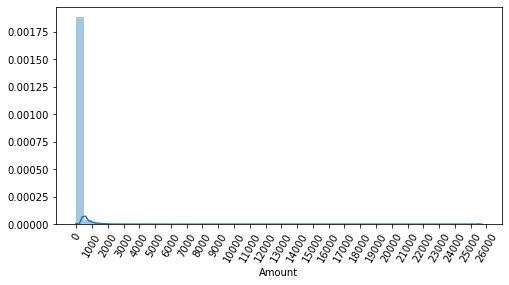

In [48]:
#데이터 분포도 변환 후 모델 학습/예측/평가
import seaborn as sns 
plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.distplot(card_df['Amount'])

In [49]:
from sklearn.preprocessing import StandardScaler
#사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처값을 변환하는 로직으로 수정
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    #변환된 Amount를 Amount_Scaled로 피처명 변경 후 DataFrame 맨 앞 칼럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [61]:
#Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('로지스틱 회귀 예측 성능')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('LightGBM 예측 성능')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

로지스틱 회귀 예측 성능
오차 행렬
[[85283    12]
 [   57    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6096,    F1: 0.7206, AUC:0.9839
LightGBM 예측 성능
오차 행렬
[[85292     3]
 [   26   120]]
정확도: 0.9997, 정밀도: 0.9756, 재현율: 0.8219,    F1: 0.8922, AUC:0.9838


In [51]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    #넘파이의 log1p()함수를 이용해 Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [52]:
#Amount를 로그 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('로지스틱 회귀 예측 성능')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('LightGBM 예측 성능')
lgbm_clf = LGBMClassifier()
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

로지스틱 회귀 예측 성능
오차 행렬
[[85282    13]
 [   60    88]]
정확도: 0.9991, 정밀도: 0.8713, 재현율: 0.5946,    F1: 0.7068, AUC:0.9622
LightGBM 예측 성능
오차 행렬
[[84987   308]
 [   62    86]]
정확도: 0.9957, 정밀도: 0.2183, 재현율: 0.5811,    F1: 0.3173, AUC:0.7650


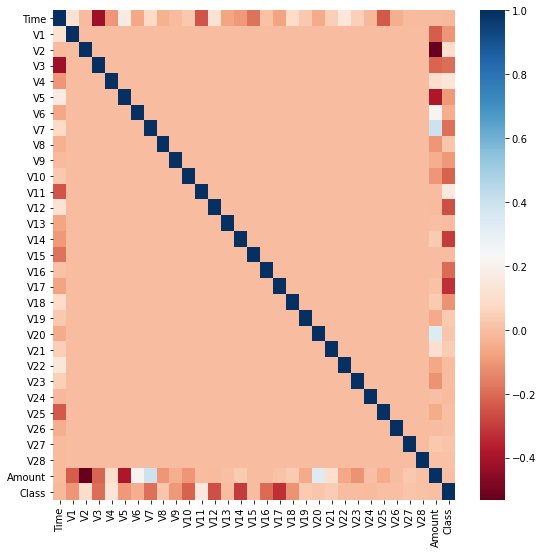

In [53]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr,cmap='RdBu')

In [54]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    #fraud(사기)에 해당하는 column 데이터만 추출, Q1과 Q3 지점을 np.percentile로 구함
    fraud = df[df['Class']==1][column] #왜 사기에 해당하는 column 데이터만 추출?
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    #IQR을 구하고 IQR에 1.5를 곱해 최댓값과 최솟값 지점 구하기
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    #최댓값보다 크거나 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [55]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치의 인덱스:', outlier_index)

이상치의 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [62]:
#get_preprocessed_df()를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    #이상치 데이터를 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('## 로지스틱 회귀 예측 성능 ##')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('## LightGBM 예측 성능 ##')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

## 로지스틱 회귀 예측 성능 ##
오차 행렬
[[85283    12]
 [   57    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6096,    F1: 0.7206, AUC:0.9839
## LightGBM 예측 성능 ##
오차 행렬
[[85292     3]
 [   26   120]]
정확도: 0.9997, 정밀도: 0.9756, 재현율: 0.8219,    F1: 0.8922, AUC:0.9838


In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 123)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처, 레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처, 레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포')
print(y_train_over.value_counts())

SMOTE 적용 전 학습용 피처, 레이블 데이터 세트: (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처, 레이블 데이터 세트: (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포
1    199020
0    199020
Name: Class, dtype: int64


In [59]:
#로지스틱 회귀
lr_clf = LogisticRegression()
#ftr_train과 tgt_train이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨
get_model_train_eval(lr_clf, ftr_train = X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[83063  2232]
 [    9   137]]
정확도: 0.9738, 정밀도: 0.0578, 재현율: 0.9384,    F1: 0.1089, AUC:0.9833


In [60]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test = X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85282    13]
 [   21   125]]
정확도: 0.9996, 정밀도: 0.9058, 재현율: 0.8562,    F1: 0.8803, AUC:0.9927
